In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder , OrdinalEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
loan = pd.read_csv('~/Desktop/Projects/Loan_prediction/data/original/loan_approval_dataset.csv' , index_col = 'loan_id')

In [51]:
loan.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [52]:
for col in loan.columns:
    print(loan[col].value_counts() , '\n')
    print('=' * 50)

 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64 

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64 

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64 

 income_annum
7000000    62
4100000    59
7600000    57
4700000    56
5300000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64 

 loan_amount
10600000    27
20000000    24
9400000     24
23900000    23
16800000    23
            ..
33400000     1
36600000     1
33800000     1
37700000     1
36100000     1
Name: count, Length: 378, dtype: int64 

 loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64 

 cibil_score
348    16
543    15
538    15
415    14
439    14
       ..
773     2
484     2
893     2
334     2
864     1
Name: count, Length: 601, dtype: int64 

 residential_assets_va

In [53]:
loan.columns = [col.strip() for col in loan.columns]

In [54]:
X_train , X_test , y_train , y_test = train_test_split(loan.drop('loan_status' ,axis = 1) , loan['loan_status'] , test_size = 0.2 , stratify = loan['loan_status'] , random_state = 42)

In [55]:
object_cols = X_train.select_dtypes(include = ['object']).columns.to_list()
int_cols = X_train.select_dtypes(include = ['int64']).columns.to_list()
float_cols = X_train.select_dtypes(include = ['float64']).columns.to_list()

In [56]:
target_encoder = LabelEncoder()

object_encoder = OrdinalEncoder()

In [57]:
y_train

loan_id
1225     Rejected
479      Approved
3066     Rejected
327      Rejected
2992     Approved
          ...    
24       Approved
234      Rejected
3299     Rejected
1398     Rejected
3223     Rejected
Name: loan_status, Length: 3415, dtype: object

In [58]:
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

In [76]:
import joblib

joblib.dump(target_encoder , '/home/sidharth/Desktop/Projects/Loan_prediction/models/encoder/enc1_target_encoder.pkl')
joblib.dump(object_encoder , '/home/sidharth/Desktop/Projects/Loan_prediction/models/encoder/enc1_object_encoder.pkl')

['/home/sidharth/Desktop/Projects/Loan_prediction/models/encoder/enc1_object_encoder.pkl']

In [59]:
y_train.sum() / y_train.__len__() , y_test.sum() / y_test.__len__() 

(np.float64(0.37774524158125916), np.float64(0.37822014051522246))

In [60]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,,,,,,,,,,,
1225,0,Graduate,Yes,9800000,23900000,14,459,1000000,13400000,21100000,7200000
479,3,Not Graduate,Yes,3600000,8600000,8,790,5400000,5900000,9800000,5200000
3066,2,Not Graduate,No,2000000,4000000,14,502,4900000,1500000,5400000,1300000
327,2,Not Graduate,Yes,3900000,11300000,12,516,3100000,0,10400000,4600000
2992,3,Not Graduate,No,2300000,8500000,12,557,3600000,1400000,6200000,1300000
...,...,...,...,...,...,...,...,...,...,...,...
24,0,Not Graduate,Yes,500000,1400000,2,551,900000,600000,1100000,300000
234,3,Not Graduate,Yes,8800000,34600000,8,386,14800000,16500000,18400000,6000000
3299,2,Not Graduate,Yes,6800000,15500000,12,338,9900000,1200000,21800000,8500000


In [61]:
X_train[object_cols] = object_encoder.fit_transform(X_train[object_cols])
X_test[object_cols] = object_encoder.transform(X_test[object_cols])

In [79]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,,,,,,,,,,,
1225,0,0.0,1.0,9800000,23900000,14,459,1000000,13400000,21100000,7200000
479,3,1.0,1.0,3600000,8600000,8,790,5400000,5900000,9800000,5200000
3066,2,1.0,0.0,2000000,4000000,14,502,4900000,1500000,5400000,1300000
327,2,1.0,1.0,3900000,11300000,12,516,3100000,0,10400000,4600000
2992,3,1.0,0.0,2300000,8500000,12,557,3600000,1400000,6200000,1300000
...,...,...,...,...,...,...,...,...,...,...,...
24,0,1.0,1.0,500000,1400000,2,551,900000,600000,1100000,300000
234,3,1.0,1.0,8800000,34600000,8,386,14800000,16500000,18400000,6000000
3299,2,1.0,1.0,6800000,15500000,12,338,9900000,1200000,21800000,8500000


In [62]:
X_train.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,-0.003412,0.003027,0.001084,-0.006619,-0.018025,-0.003301,0.002074,0.000319,-0.002574,0.007631
education,-0.003412,1.000000,0.026069,-0.006082,-0.008503,0.008026,0.011131,0.006292,0.003896,-0.005295,-0.004966
self_employed,0.003027,0.026069,1.000000,0.015655,0.015352,0.010130,-0.016646,0.020178,-0.011774,0.014614,0.012489
income_annum,0.001084,-0.006082,0.015655,1.000000,0.928968,0.006221,-0.016779,0.639475,0.640404,0.929572,0.850740
loan_amount,-0.006619,-0.008503,0.015352,0.928968,1.000000,0.002566,-0.012544,0.595892,0.599643,0.864739,0.791514
loan_term,-0.018025,0.008026,0.010130,0.006221,0.002566,1.000000,0.012346,0.001242,-0.006689,0.009611,0.013068
cibil_score,-0.003301,0.011131,-0.016646,-0.016779,-0.012544,0.012346,1.000000,-0.022733,0.002916,-0.027182,-0.008316
residential_assets_value,0.002074,0.006292,0.020178,0.639475,0.595892,0.001242,-0.022733,1.000000,0.416526,0.592604,0.531067
commercial_assets_value,0.000319,0.003896,-0.011774,0.640404,0.599643,-0.006689,0.002916,0.416526,1.000000,0.593792,0.544371
luxury_assets_value,-0.002574,-0.005295,0.014614,0.929572,0.864739,0.009611,-0.027182,0.592604,0.593792,1.000000,0.789833


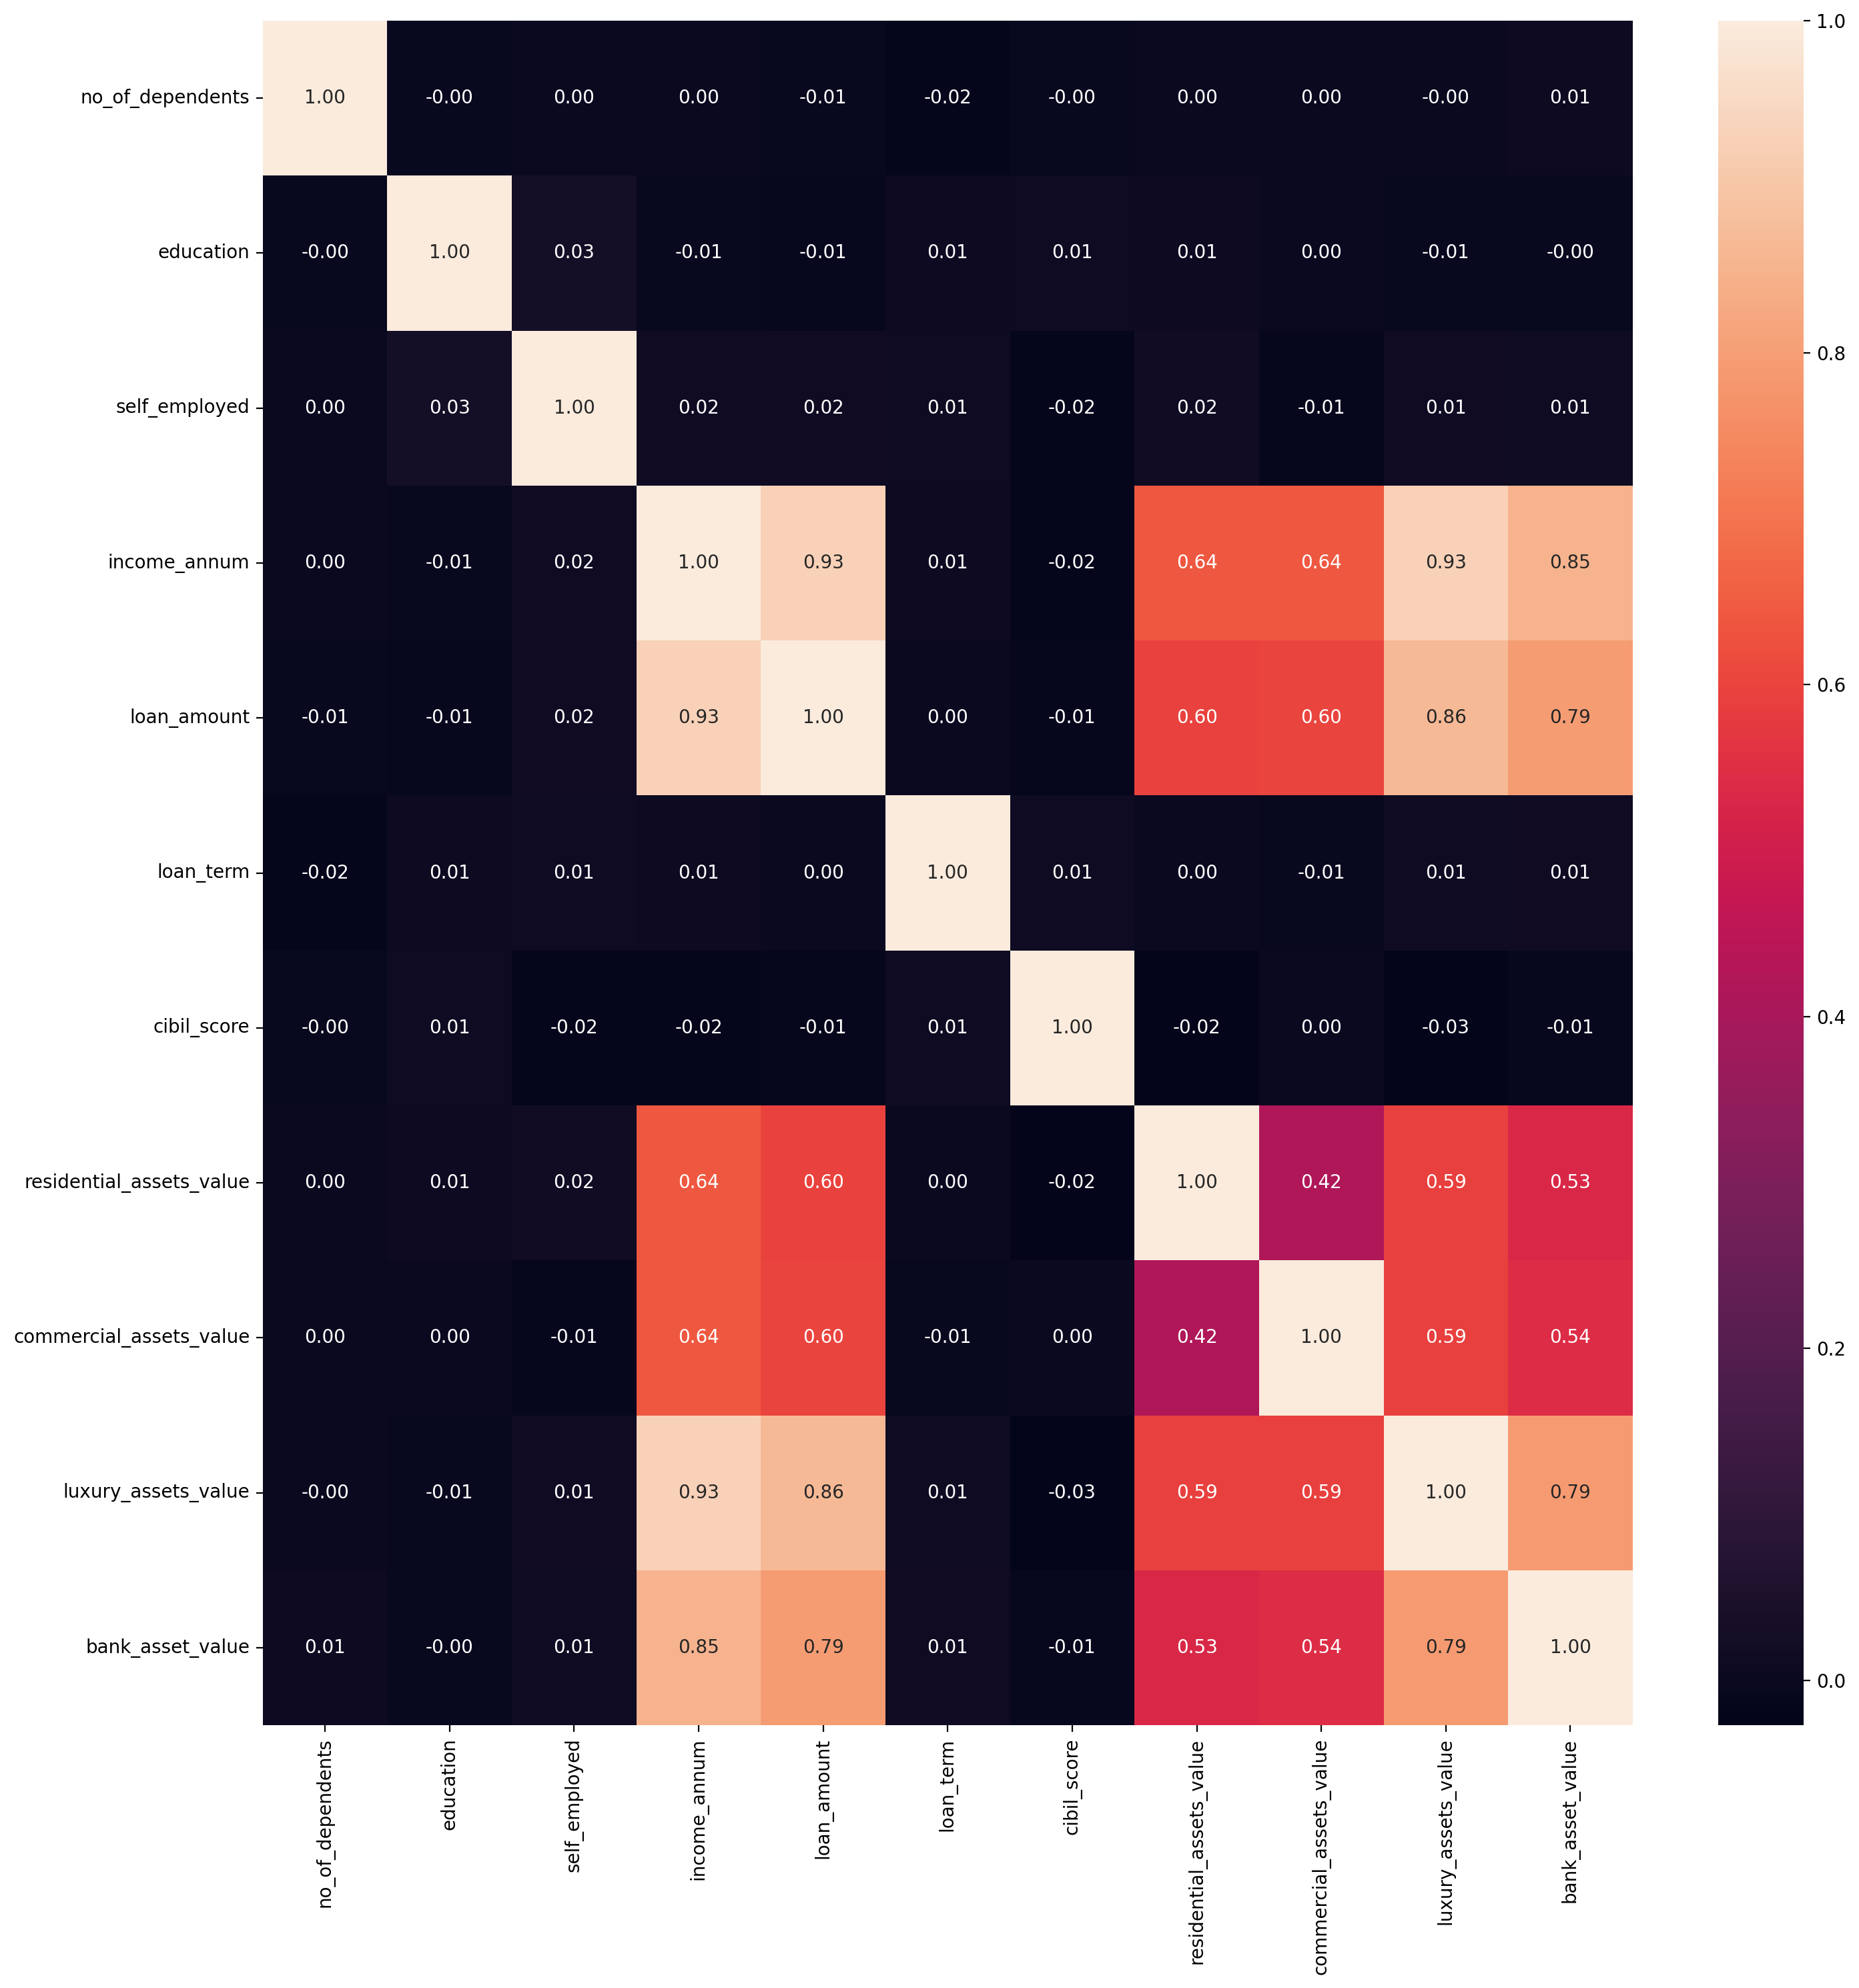

In [63]:
plt.figure(figsize = (15 ,15) , dpi = 200)

sns.heatmap(X_train.corr() , annot = True , fmt = '.2f')
plt.tight_layout()
plt.show()

In [64]:

model = RandomForestClassifier(random_state=42)

# Stratified K-fold maintains class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Stratified CV scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Fit final model
model.fit(X_train, y_train)


Stratified CV scores: [0.97803807 0.98096633 0.98096633 0.98682284 0.99121523]
Mean CV score: 0.9836
Standard deviation: 0.0048


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
joblib.dump(model , '/home/sidharth/Desktop/Projects/Loan_prediction/models/enc1_random_forest.pkl')

['/home/sidharth/Desktop/Projects/Loan_prediction/models/enc1_random_forest.pkl']

Classification Report :                precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



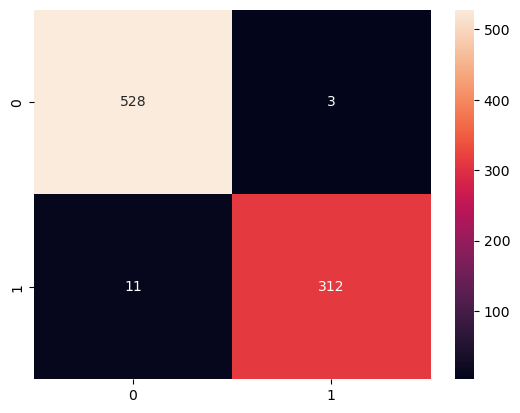

In [65]:

y_pred = model.predict(X_test)

sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt = '.0f')
print('Classification Report : ' , classification_report(y_test , y_pred))


In [66]:
import eli5
from eli5.sklearn import PermutationImportance

feature_names = X_test.columns.to_list()

perm = PermutationImportance(model).fit(X_test , y_test)

eli5.show_weights(perm , feature_names = feature_names)

Weight,Feature
0.4220 ± 0.0142,cibil_score
0.0475 ± 0.0060,loan_term
0.0213 ± 0.0052,loan_amount
0.0122 ± 0.0092,income_annum
0.0049 ± 0.0018,residential_assets_value
0.0042 ± 0.0019,bank_asset_value
0.0021 ± 0.0018,luxury_assets_value
0.0019 ± 0.0024,commercial_assets_value
0.0019 ± 0.0055,no_of_dependents
0.0009 ± 0.0009,education


In [67]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(tree_model, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Stratified CV scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Fit final model
tree_model.fit(X_train, y_train)


Stratified CV scores: [0.98828697 0.96925329 0.98096633 0.98096633 0.96486091]
Mean CV score: 0.9769
Standard deviation: 0.0086


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
joblib.dump(tree_model , '/home/sidharth/Desktop/Projects/Loan_prediction/models/enc1_decision_tree.pkl')

['/home/sidharth/Desktop/Projects/Loan_prediction/models/enc1_decision_tree.pkl']